In [229]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import least_squares

In [2]:
data = np.loadtxt('2ndorder autocorrelation without compressor.txt')

In [341]:
# Objective Function
def model(p, u):
    a,b,c,d,e = p
    y = a*(1 + np.exp(-4*np.log(2)*((u-b)/c)**2) + 4*np.exp(-3*np.log(2)*((u-b)/c)**2)*np.cos(d*u+e) + 2*np.exp(-4*np.log(2)*((u-b)/c)**2)*np.cos(d*u+e)**2)
    return y

def jac(p, u, y):
    a,b,c,d,e = p
    J = np.empty((u.size, p.size))
    J[:,0] = model(p,u)/a
    J[:,1] = (model(p,u)-a)*(1-2*(u-b)/c**2)
    J[:,2] = (model(p,u)-a)*(2*b*(u-b)/c**3)
    J[:,3] = a*(1+np.exp(-4*np.log(2)*((u-b)/c)**2) - 4*u*np.exp(-3*np.log(2)*((u-b)/c)**2)*np.sin(d*u+e) - 4*np.exp(-4*np.log(2)*((u-b)/c)**2)*np.cos(d*u+e)**2*u*np.sin(d*u+e))
    J[:,4] = a*(1+np.exp(-4*np.log(2)*((u-b)/c)**2) - 4*np.exp(-3*np.log(2)*((u-b)/c)**2)*np.sin(d*u+e) - 4*np.exp(-4*np.log(2)*((u-b)/c)**2)*np.cos(d*u+e)**2*np.sin(d*u+e))
    return J

def fun(p, u, y):
    error = model(p, u) - y
    return error

In [346]:
u = data[:, 0]
y = data[:, 1]
p = np.array([90.45052457,  10.84336012,  0.73586187, 60.27965802,  9.05522058])

res = least_squares(fun, x0=p, jac=jac, bounds=(0,100), args=(u, y), xtol=1e-8)

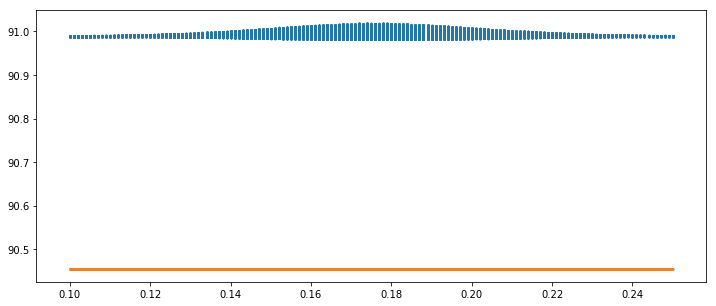

In [347]:
# Graph
#p = [9.09876055e+01, 7.3968452e+00, 30.64897435e+00, 6.30397980e+03, 9.00730881e+00]
x = np.linspace(0.1,0.25,10000)
z = model(p=res.x, u=x)
plt.figure(figsize=(12,5))
plt.scatter(data[:,0], data[:,1], s=1, label='data')
plt.scatter(x, z, s=1, label='fitted')
plt.show()